<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from keras.callbacks import EarlyStopping
import joblib
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Dataset\stores_sales_forecasting.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
df.shape

(2121, 21)

In [4]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
df.duplicated().value_counts()

False    2121
Name: count, dtype: int64

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
# Create a DataFrame of unique values
unique_values = {col: [df[col].unique()] for col in df.columns}
unique_df = pd.DataFrame(unique_values)
unique_df.T

,0
Row ID,"[1, 2, 4, 6, 11, 24, 25, 28, 30, 37, 39, 40, 5..."
Order ID,"[CA-2016-152156, US-2015-108966, CA-2014-11581..."
Order Date,"[11/8/2016, 10/11/2015, 6/9/2014, 7/16/2017, 9..."
Ship Date,"[11/11/2016, 10/18/2015, 6/14/2014, 7/18/2017,..."
Ship Mode,"[Second Class, Standard Class, First Class, Sa..."
Customer ID,"[CG-12520, SO-20335, BH-11710, SF-20065, EB-13..."
Customer Name,"[Claire Gute, Sean O'Donnell, Brosina Hoffman,..."
Segment,"[Consumer, Corporate, Home Office]"
Country,[United States]
City,"[Henderson, Fort Lauderdale, Los Angeles, Phil..."


In [9]:
df = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Country', 'Product ID', 'Postal Code', 'Category', 'Product Name'], axis=1)
df.shape

(2121, 12)

In [10]:
df.describe()

,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,349.834887,3.785007,0.173923,8.699327
std,503.179145,2.251620,0.181547,136.049246
min,1.892000,1.000000,0.000000,-1862.312400
25%,47.040000,2.000000,0.000000,-12.849000
50%,182.220000,3.000000,0.200000,7.774800
75%,435.168000,5.000000,0.300000,33.726600
max,4416.174000,14.000000,0.700000,1013.127000


In [11]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Bookcases,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Chairs,731.9400,3,0.00,219.5820
2,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Tables,957.5775,5,0.45,-383.0310
3,6/9/2014,6/14/2014,Standard Class,Consumer,Los Angeles,California,West,Furnishings,48.8600,7,0.00,14.1694
4,6/9/2014,6/14/2014,Standard Class,Consumer,Los Angeles,California,West,Tables,1706.1840,9,0.20,85.3092


<h2>EDA</h2>

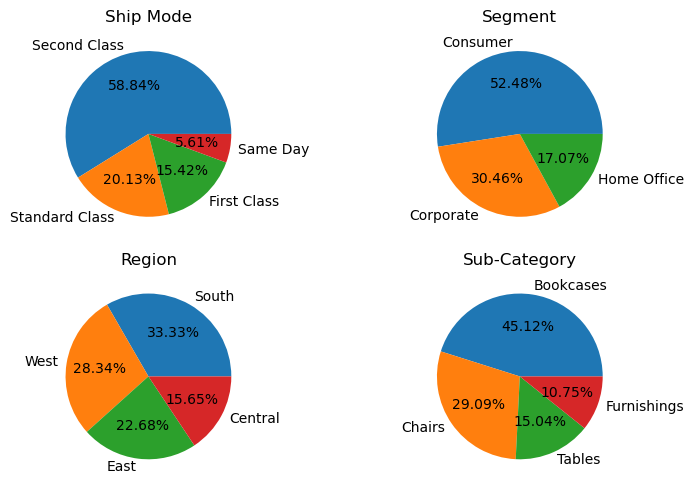

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(8, 5)) 


ax[0,0].pie(df['Ship Mode'].value_counts(), labels = df['Ship Mode'].unique(), autopct='%1.2f%%')
ax[0,0].set_title('Ship Mode')

ax[0,1].pie(df['Segment'].value_counts(), labels = df['Segment'].unique(), autopct='%1.2f%%')
ax[0,1].set_title('Segment')

ax[1,0].pie(df['Region'].value_counts(), labels = df['Region'].unique(), autopct='%1.2f%%')
ax[1,0].set_title('Region')

ax[1,1].pie(df['Sub-Category'].value_counts(), labels = df['Sub-Category'].unique(), autopct='%1.2f%%')
ax[1,1].set_title('Sub-Category')

plt.tight_layout()
plt.show();

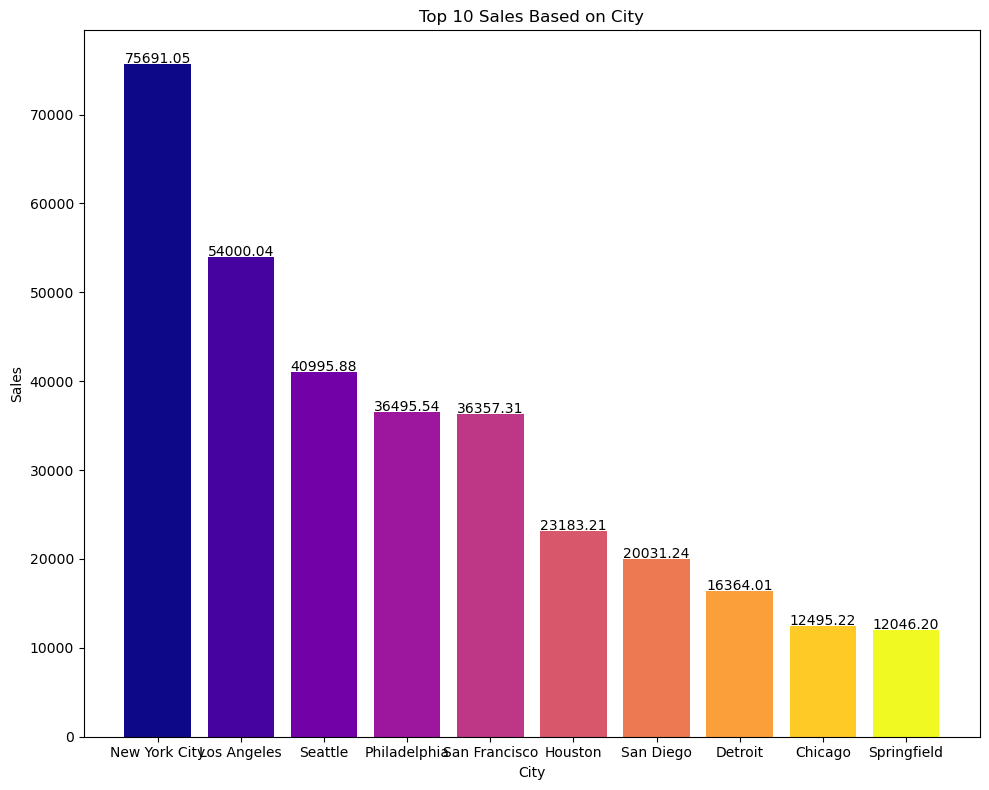

In [13]:
sales_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,8))
colors = plt.cm.plasma(np.linspace(0, 1, len(sales_city)))
plt.bar(sales_city.index, sales_city, color=colors)

# Adding labels on top of bars
for index, value in enumerate(sales_city):
    plt.text(index, value+100 , f'{value:.2f}', ha='center')
    
plt.title('Top 10 Sales Based on City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.tight_layout()
plt.show();

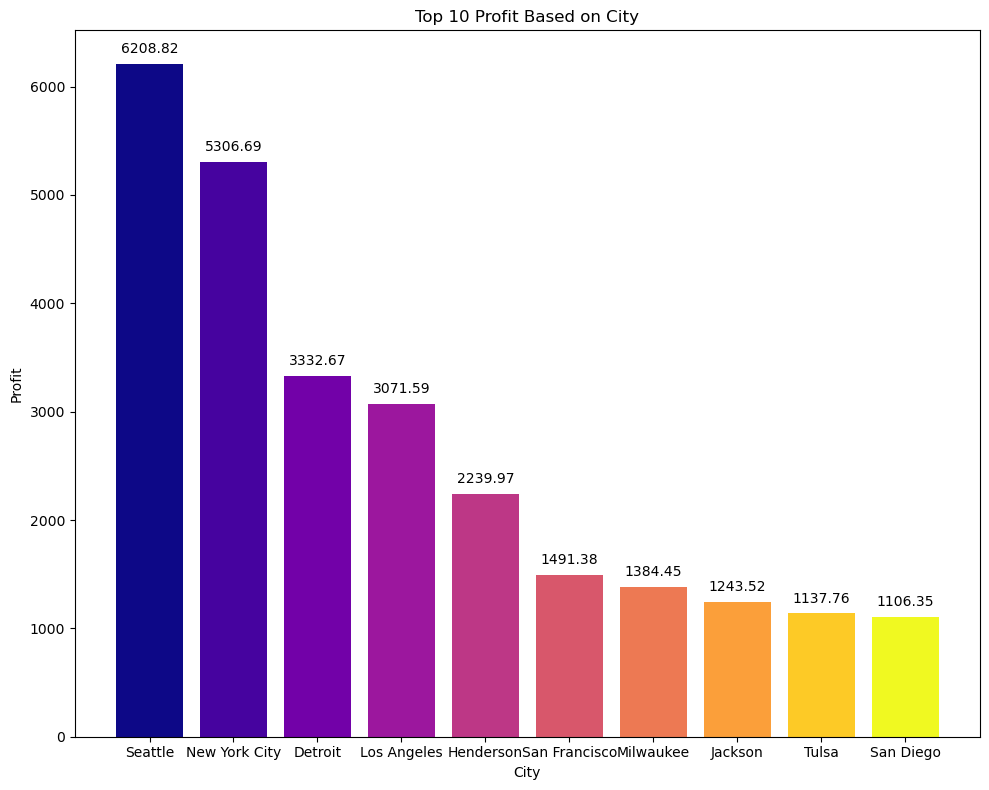

In [14]:
profit_city = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,8))
colors = plt.cm.plasma(np.linspace(0, 1, len(profit_city)))
plt.bar(profit_city.index, profit_city, color=colors)

# Adding labels on top of bars
for index, value in enumerate(profit_city):
    plt.text(index, value+100 , f'{value:.2f}', ha='center')
    
plt.title('Top 10 Profit Based on City')
plt.xlabel('City')
plt.ylabel('Profit')
plt.tight_layout()
plt.show();

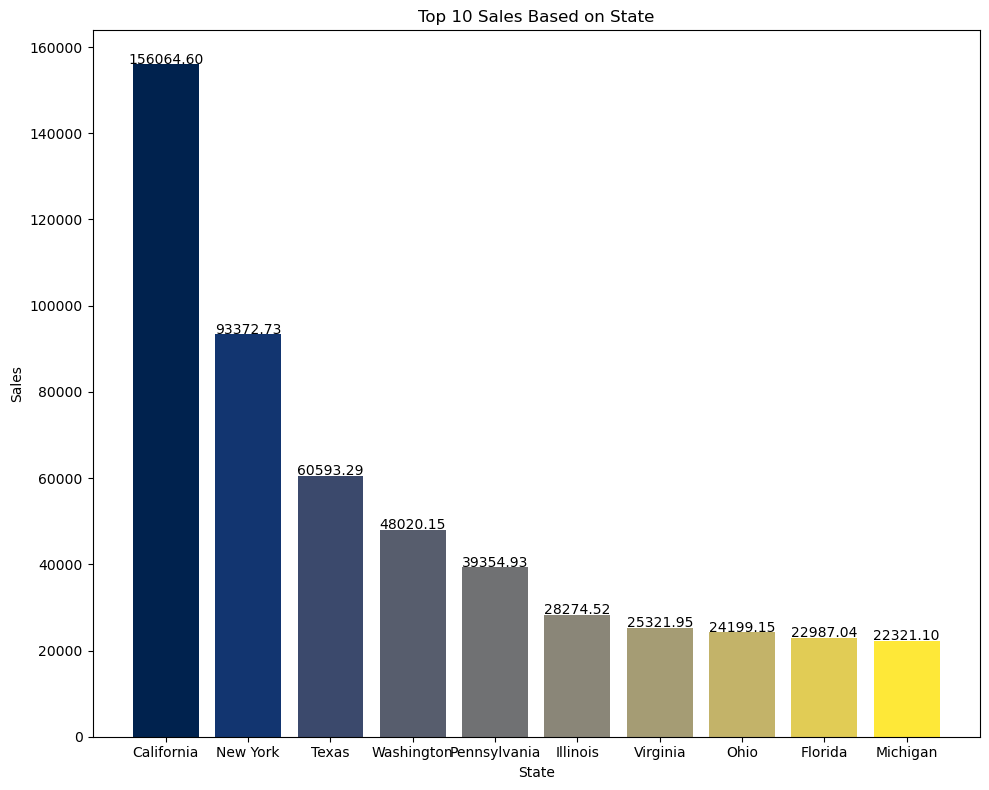

In [15]:
sales_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,8))
colors = plt.cm.cividis(np.linspace(0, 1, len(sales_city)))
plt.bar(sales_state.index, sales_state, color=colors)

# Adding labels on top of bars
for index, value in enumerate(sales_state):
    plt.text(index, value+100 , f'{value:.2f}', ha='center')
    
plt.title('Top 10 Sales Based on State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.tight_layout()
plt.show();

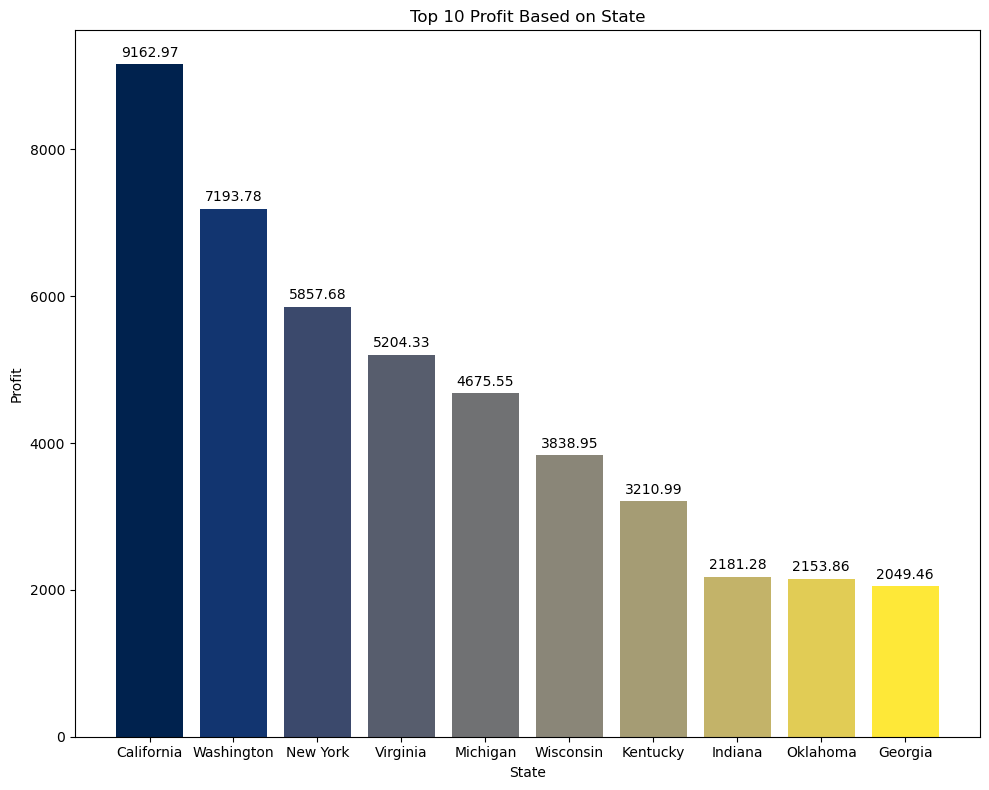

In [16]:
profit_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,8))
colors = plt.cm.cividis(np.linspace(0, 1, len(profit_state)))
plt.bar(profit_state.index, profit_state, color=colors)

# Adding labels on top of bars
for index, value in enumerate(profit_state):
    plt.text(index, value+100 , f'{value:.2f}', ha='center')
    
plt.title('Top 10 Profit Based on State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.tight_layout()
plt.show();

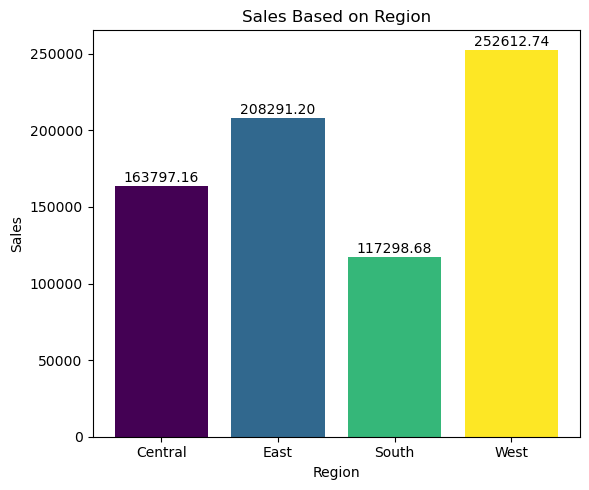

In [17]:
sales_region = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(6,5))
colors = plt.cm.viridis(np.linspace(0, 1, len(sales_region)))
plt.bar(sales_region.index, sales_region, color=colors)

# Adding labels on top of bars
for index, value in enumerate(sales_region):
    plt.text(index, value+2500 , f'{value:.2f}', ha='center')
    
plt.title('Sales Based on Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.show();

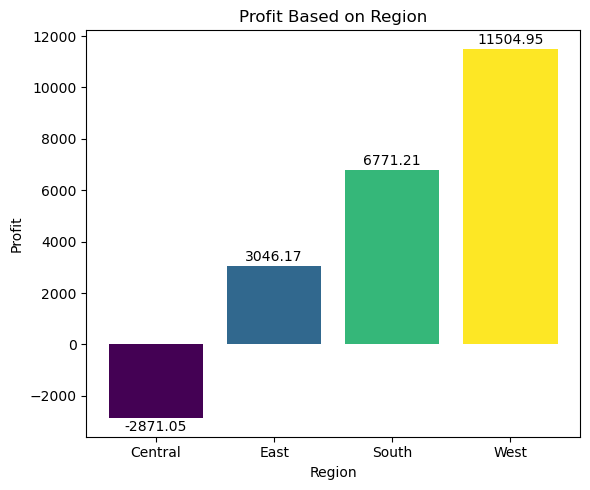

In [18]:
profit_region = df.groupby('Region')['Profit'].sum()

plt.figure(figsize=(6,5))
colors = plt.cm.viridis(np.linspace(0, 1, len(sales_region)))
plt.bar(profit_region.index, profit_region, color=colors)

# Adding labels on top of bars
for index, value in enumerate(profit_region):
    offset = 200 if value >= 0 else -500
    plt.text(index, value+offset , f'{value:.2f}', ha='center')
    
plt.title('Profit Based on Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.tight_layout()
plt.show();

# to reduce or remove business in Central region since it make losses in the region and focus on West region

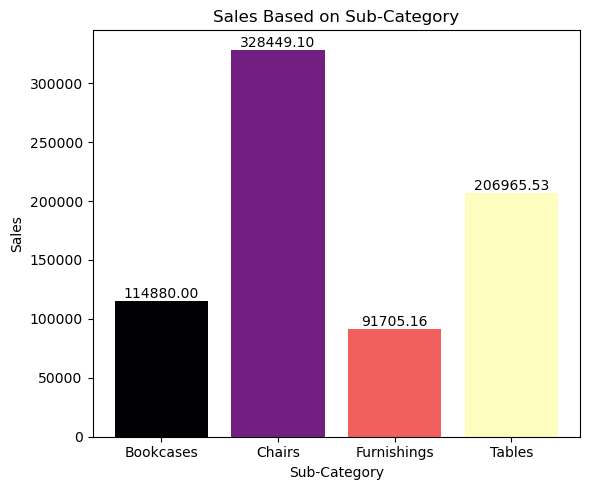

In [19]:
sales_category = df.groupby('Sub-Category')['Sales'].sum()

plt.figure(figsize=(6,5))
colors = plt.cm.magma(np.linspace(0, 1, len(sales_category)))
plt.bar(sales_category.index, sales_category, color=colors)

# Adding labels on top of bars
for index, value in enumerate(sales_category):
    plt.text(index, value+2500 , f'{value:.2f}', ha='center')
    
plt.title('Sales Based on Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show();

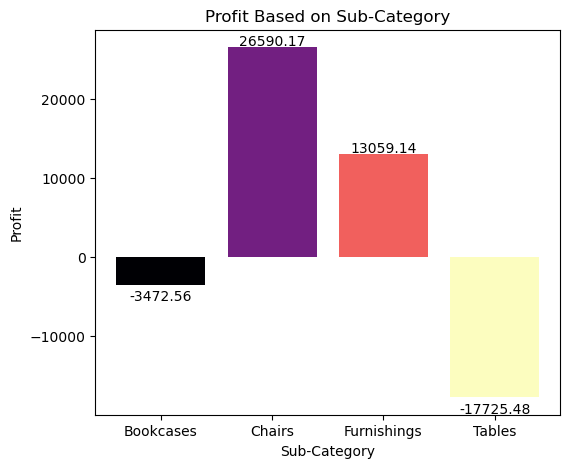

In [20]:
profit_category = df.groupby('Sub-Category')['Profit'].sum()

plt.figure(figsize=(6,5))
colors = plt.cm.magma(np.linspace(0, 1, len(profit_category)))
plt.bar(profit_category.index, profit_category, color=colors)

# Adding labels on top of bars
for index, value in enumerate(profit_category):
    offset = 200 if value >= 0 else -2000
    plt.text(index, value+offset , f'{value:.2f}', ha='center')
    
plt.title('Profit Based on Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
# plt.tight_layout()
plt.show();

# to reduce or remove bookcases and tables sub-category in the business since the sub-categories are make losses and focus on chairs and furnishings sub-categories

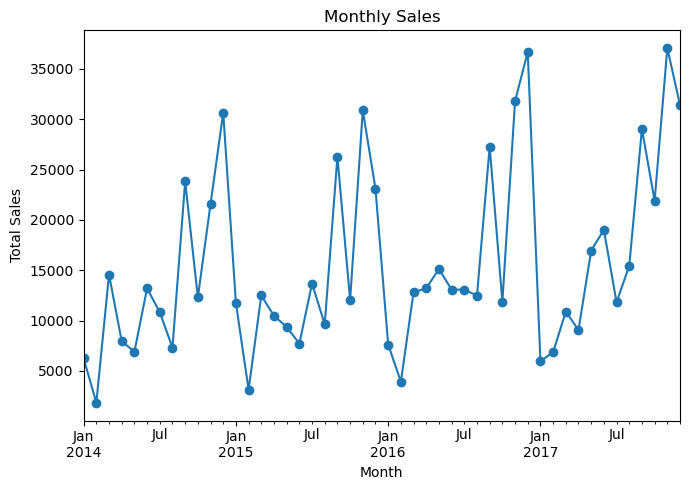

In [21]:
df2 = df.copy(deep=True)
df2['Order Date'] = pd.to_datetime(df2['Order Date'])
df2 = df2.set_index('Order Date')

monthly_sales = df2['Sales'].resample('M').sum() # resample to monthly

plt.figure(figsize=(7, 5))
monthly_sales.plot(title='Monthly Sales', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show();

In [22]:
monthly_sales

# sales increases around September to December and start to decrease in January, this information is usefult for stock planning and marketing strategies

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30    

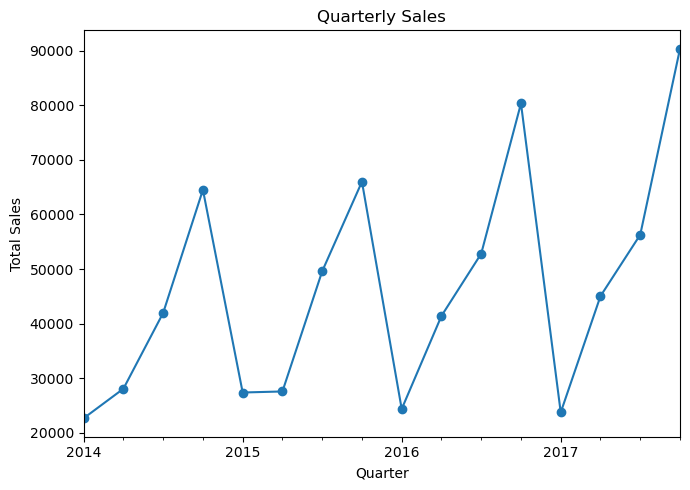

In [23]:
quarterly_sales = df2['Sales'].resample('Q').sum() # resample to quarterly

plt.figure(figsize=(7, 5))
quarterly_sales.plot(title='Quarterly Sales', marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show();

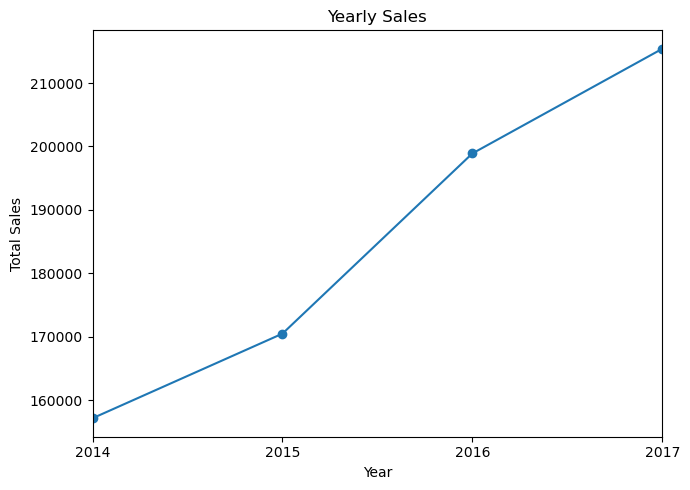

In [24]:
yearly_sales = df2['Sales'].resample('A').sum() # resample to yearly

plt.figure(figsize=(7, 5))
yearly_sales.plot(title='Yearly Sales', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show();

In [25]:
df2['Month'] = df2.index.month
monthly_avg_sales = df2.groupby('Month')['Sales'].mean()
monthly_avg_sales

Month
1     389.743723
2     250.252705
3     362.630541
4     294.917272
5     322.434205
6     365.513540
7     301.079341
8     361.968105
9     377.236137
10    310.628426
11    380.207050
12    371.396242
Name: Sales, dtype: float64

<h2>Feature Engineering</h2>

In [26]:
df['Profit_per_unit'] = df['Profit'] / df['Quantity']
df['Cost_price'] = (df['Sales'])/(df['Quantity'] * (1 - df['Discount']))

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Days to ship'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Weekend/Weekdays'] = df['Order Date'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df = df.drop(['Order Date', 'Ship Date', 'City', 'State'], axis=1)

In [28]:
df.head()

,Ship Mode,Segment,Region,Sub-Category,Sales,Quantity,Discount,Profit,Profit_per_unit,Cost_price,Days to ship,Weekend/Weekdays
0,Second Class,Consumer,South,Bookcases,261.9600,2,0.00,41.9136,20.9568,130.98,3,Weekday
1,Second Class,Consumer,South,Chairs,731.9400,3,0.00,219.5820,73.1940,243.98,3,Weekday
2,Standard Class,Consumer,South,Tables,957.5775,5,0.45,-383.0310,-76.6062,348.21,7,Weekend
3,Standard Class,Consumer,West,Furnishings,48.8600,7,0.00,14.1694,2.0242,6.98,5,Weekday
4,Standard Class,Consumer,West,Tables,1706.1840,9,0.20,85.3092,9.4788,236.97,5,Weekday


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ship Mode         2121 non-null   object 
 1   Segment           2121 non-null   object 
 2   Region            2121 non-null   object 
 3   Sub-Category      2121 non-null   object 
 4   Sales             2121 non-null   float64
 5   Quantity          2121 non-null   int64  
 6   Discount          2121 non-null   float64
 7   Profit            2121 non-null   float64
 8   Profit_per_unit   2121 non-null   float64
 9   Cost_price        2121 non-null   float64
 10  Days to ship      2121 non-null   int64  
 11  Weekend/Weekdays  2121 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 199.0+ KB


In [30]:
df.describe()

,Sales,Quantity,Discount,Profit,Profit_per_unit,Cost_price,Days to ship
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,349.834887,3.785007,0.173923,8.699327,1.935615,113.967558,3.917020
std,503.179145,2.251620,0.181547,136.049246,28.514955,123.187852,1.755234
min,1.892000,1.000000,0.000000,-1862.312400,-237.864600,1.740000,0.000000
25%,47.040000,2.000000,0.000000,-12.849000,-3.981700,19.940000,3.000000
50%,182.220000,3.000000,0.200000,7.774800,2.541000,71.370000,4.000000
75%,435.168000,5.000000,0.300000,33.726600,10.858800,160.980000,5.000000
max,4416.174000,14.000000,0.700000,1013.127000,202.625400,880.980000,7.000000


<h2>EDA after Feature Engineering</h2>

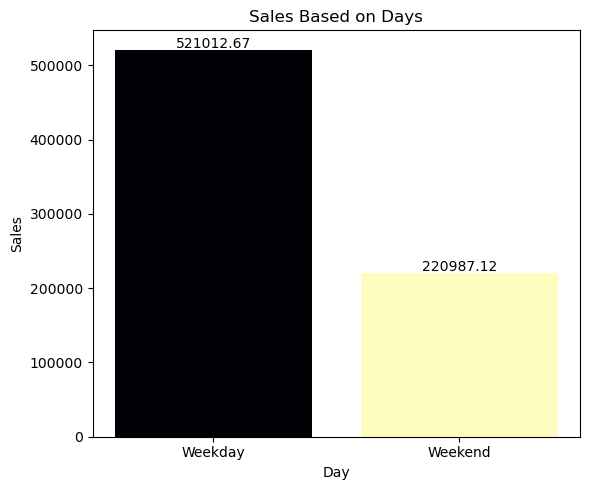

In [31]:
sales_days = df.groupby('Weekend/Weekdays')['Sales'].sum()

plt.figure(figsize=(6,5))
colors = plt.cm.magma(np.linspace(0, 1, len(sales_days)))
plt.bar(sales_days.index, sales_days, color=colors)

# Adding labels on top of bars
for index, value in enumerate(sales_days):
    plt.text(index, value+2500 , f'{value:.2f}', ha='center')
    
plt.title('Sales Based on Days')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.tight_layout()
plt.show();

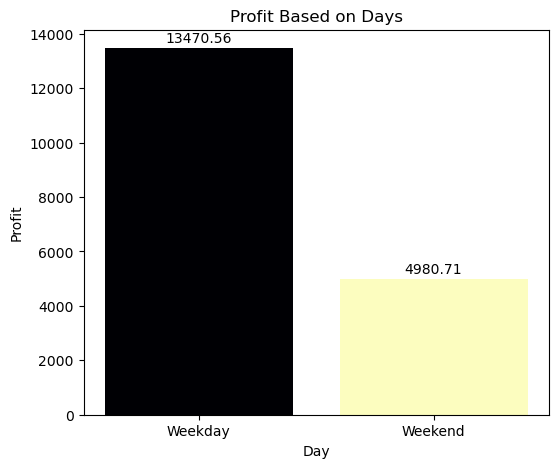

In [32]:
profit_days = df.groupby('Weekend/Weekdays')['Profit'].sum()

plt.figure(figsize=(6,5))
colors = plt.cm.magma(np.linspace(0, 1, len(profit_days)))
plt.bar(profit_days.index, profit_days, color=colors)

# Adding labels on top of bars
for index, value in enumerate(profit_days):
    plt.text(index, value+200 , f'{value:.2f}', ha='center')
    
plt.title('Profit Based on Days')
plt.xlabel('Day')
plt.ylabel('Profit')
# plt.tight_layout()
plt.show();

In [33]:
weekday_sales = sales_days['Weekday']
weekend_sales = sales_days['Weekend']
weekday_profit = profit_days['Weekday']
weekend_profit = profit_days['Weekend']

Pct_profit_sales_weekday = (weekday_profit / weekday_sales) *100
Pct_profit_sales_weekend = (weekend_profit/ weekend_sales) *100

print(f'Percentage of profit based on sales for weekday: {Pct_profit_sales_weekday:.2f}%')
print(f'Percentage of profit based on sales for weekend: {Pct_profit_sales_weekend:.2f}%')

Percentage of profit based on sales for weekday: 2.59%
Percentage of profit based on sales for weekend: 2.25%


In [34]:
Pct_profit_sales = (df['Profit'].sum() / df['Sales'].sum()) *100
print(f'Percentage of profit based on sales: {Pct_profit_sales:.2f}%')

# the profit percentage is quite small, the business is suggest to reduce sales in central region, bookcases and tables subcategories as to increase the profit percentage.

Percentage of profit based on sales: 2.49%


In [35]:
df['Profit %'] = (df['Profit'] / df['Cost_price']) * 100
df['Profit %'].describe()

count    2121.000000
mean       34.404526
std       100.174364
min      -378.000000
25%       -18.000000
50%        27.000000
75%        80.000000
max       672.000000
Name: Profit %, dtype: float64

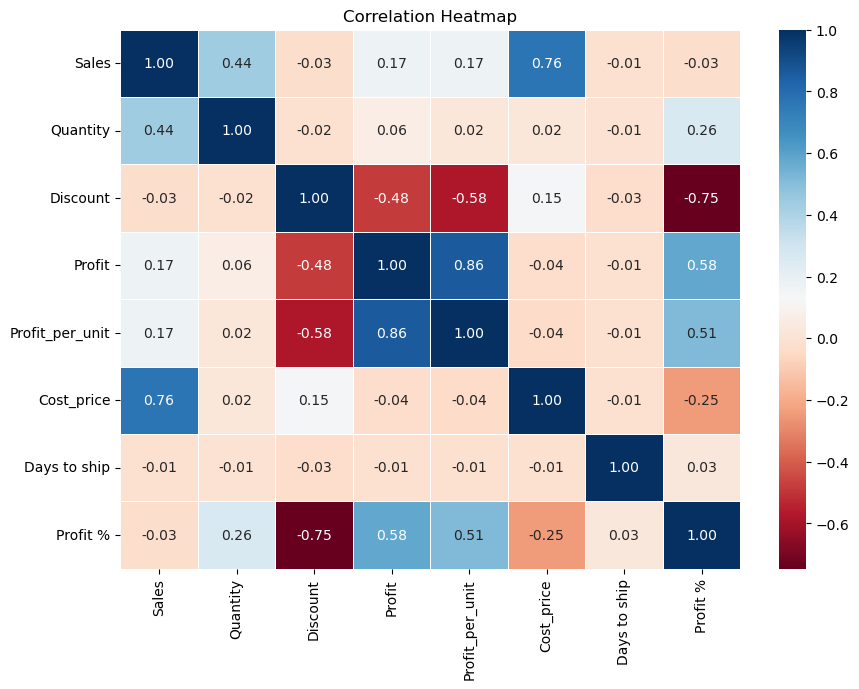

In [36]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

In [37]:
df = df.drop(['Profit_per_unit', 'Profit %'], axis=1) # drop highly correlated features

In [38]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le 

df.head()

,Ship Mode,Segment,Region,Sub-Category,Sales,Quantity,Discount,Profit,Cost_price,Days to ship,Weekend/Weekdays
0,2,0,2,0,261.9600,2,0.00,41.9136,130.98,3,0
1,2,0,2,1,731.9400,3,0.00,219.5820,243.98,3,0
2,3,0,2,3,957.5775,5,0.45,-383.0310,348.21,7,1
3,3,0,3,2,48.8600,7,0.00,14.1694,6.98,5,0
4,3,0,3,3,1706.1840,9,0.20,85.3092,236.97,5,0


In [39]:
for col in encoders:
    print(f"{col} mapping:")
    print(dict(zip(encoders[col].classes_, encoders[col].transform(encoders[col].classes_))))
    print()

Ship Mode mapping:
{'First Class': 0, 'Same Day': 1, 'Second Class': 2, 'Standard Class': 3}

Segment mapping:
{'Consumer': 0, 'Corporate': 1, 'Home Office': 2}

Region mapping:
{'Central': 0, 'East': 1, 'South': 2, 'West': 3}

Sub-Category mapping:
{'Bookcases': 0, 'Chairs': 1, 'Furnishings': 2, 'Tables': 3}

Weekend/Weekdays mapping:
{'Weekday': 0, 'Weekend': 1}



In [40]:
df.shape

(2121, 11)

In [41]:
df.tail()

,Ship Mode,Segment,Region,Sub-Category,Sales,Quantity,Discount,Profit,Cost_price,Days to ship,Weekend/Weekdays
2116,0,2,0,0,383.4656,4,0.32,-67.6704,140.98,3,0
2117,2,1,1,2,13.4000,1,0.00,6.4320,13.40,5,0
2118,2,0,2,3,85.9800,1,0.00,22.3548,85.98,3,1
2119,2,0,2,2,25.2480,3,0.20,4.1028,10.52,2,0
2120,3,0,3,2,91.9600,2,0.00,15.6332,45.98,5,1


<h2>Machine Learning</h2>

In [42]:
x = df.drop('Profit', axis=1)
y = df['Profit']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
rf = RandomForestRegressor(n_estimators=100, max_depth=6, min_samples_split=10, min_samples_leaf=3, random_state=42)
rf.fit(X_train, y_train)
r2_train = rf.score(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared(Train): 0.8525
R-squared(Test): 0.8631
MAE: 25.9982
RMSE: 49.4831


In [44]:
feature_importance = rf.feature_importances_

# Display feature importance in a sorted order
feature_names = x.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
4,Sales,0.523387
6,Discount,0.415299
7,Cost_price,0.024638
2,Region,0.019069
3,Sub-Category,0.006007
5,Quantity,0.005773
8,Days to ship,0.002839
1,Segment,0.001900
0,Ship Mode,0.000656
9,Weekend/Weekdays,0.000432


In [45]:
df2 = df.drop(['Ship Mode', 'Weekend/Weekdays'], axis=1)
x = df2.drop('Profit', axis=1)
y = df2['Profit']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
rf2 = RandomForestRegressor(n_estimators=100, max_depth=6, min_samples_split=10, min_samples_leaf=2, random_state=42)
rf2.fit(X_train, y_train)
r2_train = rf2.score(X_train, y_train)

# Make predictions
y_pred = rf2.predict(X_test)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared(Train): 0.8814
R-squared(Test): 0.8533
MAE: 26.6371
RMSE: 51.2297


In [47]:
# Save the trained model
joblib.dump(rf2, 'ML_model.pkl')
print("ML model saved successfully!")

ML model saved successfully!


<h2>Deep Learning</h2>

In [48]:
x = df.drop(['Ship Mode', 'Weekend/Weekdays', 'Profit'], axis=1)
y = df['Profit']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [49]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 16661.7832 - mae: 67.0224 - val_loss: 15523.0654 - val_mae: 56.4460
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 11961.3770 - mae: 56.3720 - val_loss: 8524.7461 - val_mae: 55.3758
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8692.4238 - mae: 51.4370 - val_loss: 6756.7617 - val_mae: 44.7418
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8676.6113 - mae: 46.0561 - val_loss: 7195.3833 - val_mae: 42.5936
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5493.4551 - mae: 38.8682 - val_loss: 3483.2031 - val_mae: 30.8856
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6043.8643 - mae: 37.6523 - val_loss: 3469.5627 - val_mae: 31.0800
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 4656.3911 - mae: 35.6321 - val_loss: 5668.0024 - val_mae: 36.7593
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5043.2539 - mae: 35.9691 - val_loss: 3020.7151 -

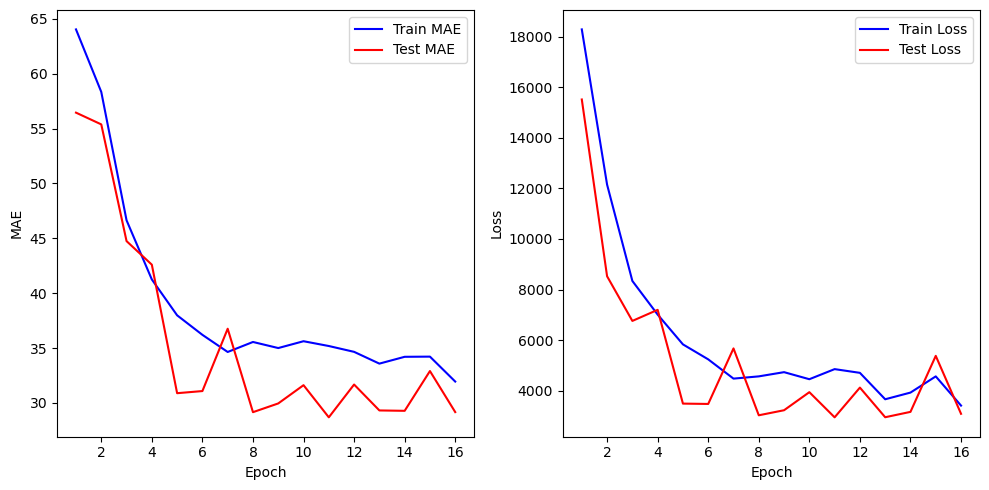

In [50]:
# learning curve
mae2 = history.history['mae']
val_mae2 = history.history['val_mae']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs = range(1, len(mae2) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, mae2, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae2, 'r', label='Test MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss2, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()

plt.show();

In [51]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Root Mean Squared Error (RMSE): 55.4923
Mean Absolute Error (MAE): 29.1641
R-squared (R2): 0.8279


In [52]:
# Save the trained model
model.save('DL_model.keras')
print("DL model saved successfully!")

DL model saved successfully!


<h2>ML & DL Models' Predictions</h2>

In [53]:
# Load models
ML_model = joblib.load('ML_model.pkl')
DL_model = load_model("DL_model.keras")

# Make predictions (Segment=customer, Regoin=West, Sub-Category=Tables, Sales=100, Quantity=, Discount=0, Cost_price=86, Days to ship=3)
new_data = [[0, 3, 3, 100, 1, 0, 86, 3]]  # Example input
ML_prediction = ML_model.predict(new_data)
new_data_scaled = scaler.transform(new_data)
DL_prediction = DL_model.predict(new_data_scaled)

print("ML Predicted profit:", ML_prediction)
print("DL Predicted profit:", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
ML Predicted profit: [24.18053274]
DL Predicted profit: [[22.653742]]
